<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="10">  Scientific Calculus and Applications (SCA) </font></p>
<p><font size="10">  Linear Systems</font></p>
</p></br>
</p>
</CENTER>

----------------------------
# Numerical Méthods

# TP n°2 : Resolution of non-linear algebraic systems



In order to control a poly-articulated robot of the type shown in Fig. 1, one of the problems of robotics is to calculate the joint coordinates ($\theta_0$, $\theta_1$, $\theta_2$) that it is necessary to apply to the joints 1, 2 and 3 in order to control the position of the "wrist", assimilated here to a point $P$.



<figure>
<table><tr>
<td> <img src="PUma560.jpg" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="robot1.jpg" alt="Drawing" style="width: <400px;"/> </td>
</tr></table>
        <center>Fig. 1: PUMA robot & Diagram of the PUMA robot</center>
</figure>





Thanks to the geometric equation, it is possible to define the coordinates of the $P$ point from the angles
$\theta_i$ and lever arm using the following sytem.

$$	\left\lbrace 
	\begin{array}{l}
\cos{(\theta_0)}\left( h_1 \cos{\left(\theta_1\right)} − h_2 \sin{\left(\theta_1 + \theta_2\right)}\right) = x  \\ 
\sin{(\theta_0)}\left( h_1 \cos{\left(\theta_1\right)} − h_2 \sin{\left(\theta_1 + \theta_2\right)}\right) = y  \\
h_2 \cos{(\theta_1 +\theta_2)}+h_1 \sin{(\theta_1)}  = z
	\end{array} 
	\right.\quad\quad (1)$$

Reminder: Our goal is to determine the angular coordinates $ (\theta_0, \theta_1, \theta_2) $ of the robot
which allow the point $P$ to reach a target $(x, y, z)$ and not to find $(x, y, z)$ from
$ (\theta_0, \theta_1, \theta_2) $.
    
For this, we must solve the following system of nonlinear equations:
$${\bf f}({\bf \theta})=0$$

i.e.

$$	\left\lbrace 
	\begin{array}{l}
\cos{(\theta_0)}\left( h_1 \cos{\left(\theta_1\right)} − h_2 \sin{\left(\theta_1 + \theta_2\right)}\right) − x = 0 \\ 
\sin{(\theta_0)}\left( h_1 \cos{\left(\theta_1\right)} − h_2 \sin{\left(\theta_1 + \theta_2\right)}\right) − y = 0 \\
h_2 \cos{(\theta_1 +\theta_2)}+h_1 \sin{(\theta_1)}−z = 0
	\end{array} 
	\right. \quad\quad (2)$$
     
which amounts to seeking the solution of:
$$f(\theta)=\left( \begin{array}{c}
0\\ 
0\\ 
0
\end{array} \right)$$

with $\theta=\left( \begin{array}{c}
\theta_0\\ 
\theta_1\\ 
\theta_2
\end{array} \right)$ et $h=\left( \begin{array}{c}
h_0\\ 
h_1 \\
h_2                                 
\end{array} \right)$ where $h$ defines the lengths of the arms.
    

# Step 1: Resolution by Newton's Method

To solve this system, we apply Newton's method.

At each iteration, we have:

$$\theta^{(k+1)}=\theta^{(k)}+\delta_{\theta}$$

$\delta_{\theta}$ is obtained from the solution of:

$$f(\theta^{(k)})+J_f(\theta^{(k)})\cdot \delta_\theta =0$$

Finally, at each iteration, the linear system produced by Newton's method will be solved using
the LU decomposition provided by Python.

Note: For your convenience, two functions are provided:
- pos: function that returns the position $(x, y, z)$ of the wrist according to the angular coordinates. The function also takes as input the length of the arms (problem data).
    
- Jacobian: function that returns the Jacobian of the previous function.

## 1) Preparation


Give a particular attention to the input-output of each script.
(This part will be validated collectively by your supervisor).

<div style='mso-element:para-border-div;border:solid windowtext 1.0pt;
mso-border-alt:solid windowtext .5pt;padding:1.0pt 4.0pt 1.0pt 4.0pt ; background-color : #ffffE0'>

<p class=MsoNormal style='border:none;mso-border-alt:solid windowtext .5pt;
padding:0cm;mso-padding-alt:1.0pt 4.0pt 1.0pt 4.0pt'>
<span class=GramE>
Scripts qu'il va falloir créer (voir plus bas pour les interfaces) :<br />
<ul>
    <li> fvec : la fonction **f**  qui est donnée par l'équation (2)<br />
        <ul>
            f : Fonction que l'on cherche à annuler.<br />
              Représente l'écart entre la position du poignet et la cible. <br />
            <li>  Entrées : <ul> 
                    <li> $h$     = données du problème (longueur des bras) </li>
                    <li> $\theta$ = variables (angles articulations)</li>
                    <li> $x_{cible}$ = position cible </li></ul></li>
            <li> Sortie :   $f$     = écart entre la position calculée et la position cible</li>
            <li> Fonction utilisée: $pos(.)$ qui calcule la position de la cible à partir de $\theta$</li>
        </ul></li>   
    <li> newton_step : <br />
        <ul>
           <li>Fonction qui effectue un pas de la méthode de Newton $\theta^{(k)} \rightarrow \theta^{(k+1)}$ ; <br />
           Effectue un pas de l'itération de Newton</li>
           <li> Entrée : <ul> 
                   <li>$\theta$ = estimée courante ($\theta^{(k)}$)</li>
                   <li>   $h$ et $x_{cible}$ = données du problème</li></ul></li>
           <li> Sortie : $\theta_{next}$ = nouvelle estimée ($\theta^{(k+1)}$) </li>  
        </ul></li>
    <li> newton : <br />
        <ul>
          fonction qui résout le problème pour une valeur initiale $\theta^{(0)}$ et une cible $(x, y, z)$ ;  <br />
          <li> Entrée : <ul> 
             <li> h et xcible</li></ul></li>
          <li> Sortie :<ul> 
            <li> theta = angle estimé</li></ul></li>
        </ul></li>
    <li> tp2 : <br />
        <ul>
         script principal qui lance les tests et affichages.</ul></li>
</ul>  
    </span></p>

</div>

## 2) Implémentation

Write the various scripts identified in Python.

We will take as stopping criterion in Newton's method, a sufficiently small increment:

$$∥\theta^{(k+1)} − \theta^{(k)}∥ \leq \varepsilon\quad \mathrm{avec}\quad \varepsilon \triangleq 10^{−12}$$

If possible, test the different scripts independently (or by "layer").
 
Here some used python functions 

- P, L, U = scipy.linalg.lu(A)  computes a LU decomposition 
 
- np.transpose(P) computse the transpose of P

-  C = np.dot(A),f) computes C=A*f;

- np.subtract(x1, x2) computes the substraction between two array x1 and x2

- scipy.linalg.norm(A) computes the norm L2 of a vector or the Froboeniuis norm of an array


In [3]:
#matplotlib inline
from pylab import *
from matplotlib import pyplot
import numpy as np
import scipy as sp
import scipy.linalg   # SciPy Linear Algebra Library


# Wrist position in Cartesian coordinates
# From a given theta computes the handle position
# cf equation (1)
# Inputs: h     = problem data (arm length)
#         theta = variables (joint angles)
# Output: f     = handle position (Cartesian coordinates)
def pos(h,theta):
    f=np.array([0.,0.,0.]);
    f[0] = cos(theta[0])*(h[1]*cos(theta[1])-h[2]*sin(theta[1]+theta[2]));
    f[1] = sin(theta[0])*(h[1]*cos(theta[1])-h[2]*sin(theta[1]+theta[2]));
    f[2] = h[2]*cos(theta[1]+theta[2]) + h[1]*sin(theta[1]);
    
    return(f)


# Jacobian of function fvec.
# Inputs: h     = problem data (arm length)
#         theta = variables (joint angles)
# Output: J     = Jacobian of the previous function
def jacobienne(h,theta): 
    J=np.zeros((3,3));

    J[0,0]  = -sin(theta[0])*(h[2]*cos(theta[1])-h[2]*sin(theta[1]+theta[2]));
    J[0,1] = cos(theta[0])*(-h[1]*sin(theta[1])-h[2]*cos(theta[1]+theta[2]));
    J[0,2] = -h[2]*cos(theta[0])*cos(theta[1]+theta[2]);

    J[1,0] = cos(theta[0])*(h[1]*cos(theta[1])-h[2]*sin(theta[1]+theta[2]));
    J[1,1] = sin(theta[0])*(-h[1]*sin(theta[1])-h[2]*cos(theta[1]+theta[2]));
    J[1,2] = sin(theta[0])*(-h[2]*cos(theta[1]+theta[2]));

    J[2,0] = 0;
    J[2,1] = -h[2]*sin(theta[1]+theta[2])+h[1]*cos(theta[1]);
    J[2,2] = -h[2]*sin(theta[1]+theta[2]);
    return (J)


# Function that one seeks to cancel.
# Define f(theta) (cf equation (2))
# Represents the difference between the wrist position and the target.
# Inputs: h        = problem data (arm length)
#         theta    = variables (joint angles)
#         xcible   = target position
# Output: f        = difference between calculated position and target position
def fvec(h,theta,xcible):
    # initialization of f
    f=np.array([0.,0.,0.]); 
    
    # compute f(theta)
    ##### to fill #####
    
    return(f)

# Take one step of Newton's iteration
# Entry:  theta        = current estimate (theta^(k))
#         h and xcible = problem data
# Output: thetanext    = estimated new (theta^(k+1))
def newton_step(h,xcible,theta):
    # initialization
    y=np.array([0.,0.,0.]); 
    d_theta=np.array([0.,0.,0.]);

    # on commence par évaluer la jacobienne
    J=jacobienne(h,theta);
    f=fvec(h,theta ,xcible); # Composantes du second membre (f(x))
    
    # Compute d_theta using the LU deomposition 
    P, L, U = scipy.linalg.lu(J); # utilisation de la decomposition LU de python (be careful with P)
    # Python gives P.L.U=A
    # We have A.theta=-f, P.L.U=-f but we solve L.U=P^{T}.(-f)
    #   P transpose = P inverse
    
    # Résolution du système:
    # firtly we need to invert the line of f considering matrix P
    F2 = -np.dot(np.transpose(P),f) #F2=-P*f;
    
    # We need to inverse L.U.theta = F2 to find d_theta
    # find the solution of the two systems Lz = b and then Ux=z
    # to fill
    
    # incrémentation of d_theta
    thetanext = theta + d_theta;        
    
    return(thetanext)
    
# Problem data: h and xcible
# Output: theta = estimated angle
def newton(h,xcible,theta0): 

    #initialization
    theta = np.copy(theta0);
       
    # include a criteria in the loop
    
    ##### to fill #####
        
    return(theta)


# 3) Test and Analysis

In a  script (tp2), test your algorithm with the following data:

$$h_0 =h_1 =h_2 =1$$
    
and for the following 3 cases:

## a) Case 1:

$x=0.2$, $y=0.3$ and $z=0.4$, from $\theta^{(0)} = \left( \begin{array}{c}
0\\ 
0\\ 
0
\end{array} \right).$

In [4]:
%matplotlib inline
from pylab import *
from matplotlib import pyplot
import numpy as np

# arms length
h=np.array([1.,1.,1.]);

# target
xcible =np.array([0.,0.,0.]);# to modify 

# Initialization
theta0 =np.array([0.,0.,0.]);# to modify or not

# solving from theta0:
theta=newton(h,xcible ,theta0)

# We obtain the following solution : 
print('We obtain the following solution : theta = ',theta)



We obtain the following solution : theta =  [0. 0. 0.]


Compare your result with theta =  [ 0.98279372 -0.46095858  1.02555084] and indicate the distance (norm L2) between the x obtained and the target.

## b) Case 2: 
    
Modify your code so that the program does not loop infinitely in case of non-convergence, by introducing a maximum number of iterations (for example, 100), then test it with the following target:

$x=1$, $y=0$, and $z=−1$,
    
Firstly, from $\theta^{(0)}\triangleq  \left( \begin{array}{c}
0\\ 
0\\ 
0
\end{array} \right)$ then $\theta^{(0)}\triangleq \left( \begin{array}{c}
0\\ 
0\\ 
3
\end{array} \right)$. 

Find a simple way to compare the results obtained.

In [6]:
# Change the code: include a maximum number of iterations 
# Problem data: h and xcible
# Returns: solution angles
def newton_3b(h,xcible,theta0):
    theta=theta0;
    absdtheta =1;
    nbre=0; # nombre d'iteration
    
    ##### to fill #####

    return(theta)


# target
xcible =np.array([1,0, -1]);
# thetha0  1:
theta=newton_3b(h,xcible ,np.array([0,0,0]))
# est-ce une solution ?
##### to modify #####
print('residu=?');
# # thetha0  1:
theta=newton_3b(h,xcible ,np.array([0,0,3]))
##### to modify #####
print('residu=?');

residu=?
residu=?


We obtain the following ???, which show that the method did not converge in the first case:

Case 1:

    residue is equal to 2.2479223770068995

Case 2: 

    residue is equal to 3.173215032376466e-15
    
What are your comments?


## c) Case 3: 
        
Finally, try to solve the following case:
            
$x=1.5$, $y=1$, and $z=1$.



In [8]:
xcible =np.array([1.5,1, 1]);
# résolution à partir de (0,0,0):
theta=newton_3b(h,xcible ,np.array([0,1,3]))
# est-ce une solution ?
print('residue=');

??=


Comment the obtained result.



# Step 2: Resolution by the fixed point method

**a)** Repeat case 1 above and test the fixed-point method:
    
$$\theta^{(k+1)}\triangleq \theta^{(k)} + f(\theta^{(k)})$$

starting from $\theta^{(0)}\triangleq \left( \begin{array}{c}
0\\ 
0\\ 
0
\end{array} \right)$ and using the same stopping criterion as for Newton.

Complete the following script in order to use the fixed-point method.

In [11]:
xcible =np.array([0.2,0.3,0.4]);
theta =np.array([0,0,0]);
eps=1e-12;

##### to fill #####

print('solution obtained with the fixed point : ', theta);


solution obtained with the fixed point :  [0 0 0]


 **b)** Check with Python that the conditions necessary for the convergence of the method
     are actually respected (see course).
    
     Let

$$g(\theta) = \theta + f(\theta).$$

According to the course, the jacobian's spectral radius of $g$ in $\theta^*$ (the solution) must be smaller than
1

np.linalg.eig(B) donne les valeurs propres de B

np.abs(C) donne le module de chaque composante de C



In [5]:
# We assume that theta is very close to the solution vector
# Jacobian of theta function -> g (theta)
A=eye(3);##### to modify####

# Calcul du rayon spectral
D,V=
module=

print('rayon spectral ',max(module))

SyntaxError: invalid syntax (<ipython-input-5-5aeebcf8b7c2>, line 6)

Comments the result obtained on the spectral radius

# 5) Sensitivity Analysis

We will finally study how the solution changes when parameters of the problem, the lengths
$h_1$ and $h_2$, are "disturbed" (slightly modified).

Be careful, $h_0$ and $(x, y, z)$ remain fixed parameters of the problem:
    
$$h_0 =1, x=0.2, y=0.3, z=0.4.$$

The vector $ h = (h_1, h_2) $ becoming mathematically variables, the equation

$$f(\theta) = 0$$

must now be written:


$$f(\theta,h) = 0$$

Note the initial parameter set

$h^{*}= \left( \begin{array}{c}
1\\ 
1
\end{array} \right)$

and $\theta^*$ the solution (obtained previously, by the method of Newton or the fixed point). So we have

$$f(\theta^*,h^*) = 0.$$

For a perturbed vector $ h^* + \delta h$, let $ θ^* + \delta θ $ be the corresponding solution. We have again:

$$f(θ^* +\deltaθ,h^* +\delta h)=0 \quad \quad(1)$$

A development at order 1 of this equation then gives:

$$ \begin{array}{rcl}
0 & = & f(\theta^* + \delta \theta, h^* + \delta h)\\
& = & f(\theta^*, h^*) + J_f (\theta^*, h^*)(\delta \theta, \delta h)\\
& = & 0 + J_{f\%\theta}(\theta^* ,h^* )\delta \theta + J_{f\%h}(\theta^* ,h^*)\delta h
\end{array}
$$



où

- $J_{f\%\theta}$ represents the Jacobian of f when h is considered constant (ie, that already
previously calculated)
- $J_{f\%h}$ the Jacobian of f when θ is considered constant.

a) Derive from equation (2) a so-called sensitivity formula that characterizes the way in which the solution
deviates from the nominal solution $ θ^* $ according to the pertubation $\delta h $.

$$\delta\theta \sim −J_{f\%θ}(θ^*,h^*)^{−1}J_{f\%h}(\delta^*,h^*)\delta h$$

b) Implement a function script calculating $J_{f\%h}$

In [11]:
# we enter h and theta in the form of vectors
def jacobienne_h(h,theta):
    J=np.zeros((3,2))
    J[0,0] = cos(theta[0])*cos(theta[1]);
    J[0,1] = -cos(theta[0])*sin(theta[1]+theta[2]);
    
    J[1,0] = sin(theta[0])*cos(theta[1]);
    J[1,1] = -sin(theta[0])*sin(theta[1]+theta[2]);
    
    J[2,0] = sin(theta[1]);
    J[2,1] = cos(theta[1]+theta[2]);
    return (J)

 c) We generate a set of perturbation of the form:
􏰍
$$\delta h= \left( \begin{array}{c}
\alpha\\ 
\alpha
\end{array} \right)$$

where $ \alpha $ is a discretization of $ [- 0.1,0.1] $ in steps of $ 10^{- 2} $. Make a graph where you will superimpose
two curves representing the value of $ ∥ \delta \theta∥ $ according to $ \alpha $:
    
1. one obtained by solving the problem disturbed (1)

2. the other obtained via the sensitivity formula

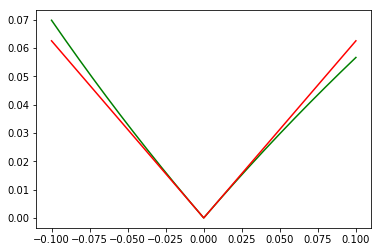

In [12]:
#discretization of the h disturbance
alpha = np.linspace(-0.1,0.1,201)

n=np.size(alpha)

# vector of observed discrepancies (solving the disturbed problem)
dtheta_obs=np.zeros((n,1))
# vector of estimated deviations (via sensitivity formula)
dtheta_est=np.zeros((n,1));
# sensitivity matrix
S= # à compléter

for i in range(0,n):
    # calculation of the new solution
    # (note: we start from the nominal solution)
    # dtheta estimé à partir des observation de theta
    new_theta = newton([1,1+alpha[i],1+alpha[i]],xcible,theta);
    dtheta_obs[i]=0 # to modify
    
    a=[alpha[i],alpha[i]]
    
    # dtheta estimé à partir du jacobien et de \delta_h
    dtheta_est[i]=0 # to modify

plot(alpha ,dtheta_obs ,'g',alpha ,dtheta_est ,'r');


# 6) Basins of attraction (Subsidiary question)

The purpose is to display an approximation of the basins of attraction of the fixed-point and Newton methods.
via the predefined function contourf.

To lighten the calculations, we will consider here that a point is in the bassin of a method
if the application of an iteration from this point allows to get closer to the solution
(be aware that this is not the current challenge).
 
In addition, to produce a 2D display, we will only vary $ \theta_1 $ and $ \theta_2 $.
 
Finally, to avoid introducing any additional bias in the distance calculation, we start with a solution
known in advance:

$$ \theta^* \triangleq \left (\begin{array} {c}
\pi / 3 \\
- \pi / 7 \\
\pi / 3
\end{array} \right) $$
 

a) Quickly study the contourf function.

b) Calculate the target corresponding to the angular coordinates $ \theta ^ * $ (this target will define the problem to be solved).

In [9]:
h=np.array([1,1,1]);
vtheta_sol=np.array([math.pi/3,-math.pi/7,math.pi/3]); # "v" for "vector" 
xcible=pos(h,vtheta_sol);

c) Generate, for the contourf function, a discretization of the area

$$ [\theta_1^* -3, \theta_1^* +3] \times [\theta_2 ^ * -3, \theta_2 ^ * +3] $$

  in steps of 0.05.

In [ ]:
dtheta = np.linspace(-3,3,501); 
n=np.size(dtheta);

theta1=np.zeros((n,n)); 
theta2=np.zeros((n,n)); 
for i in range(0,n):
    for j in range(0,n): 
        theta1[i,j]=vtheta_sol[1]+dtheta[i]; 
        theta2[i,j]=vtheta_sol[2]+dtheta[j];


d) Assign each point in this field a value of 1 if the point is in the fixed point method and 0 otherwise.
Display the basin via contourf.

In [ ]:
z=np.zeros((n,n)) 
for i in range(0,n):
    for j in range(0,n): 
        vtheta0 = [theta1[i,j], theta2[i,j], vtheta_sol[2]]; 
        vtheta1 = # to fill un pas de Newton
        
        if # to  define:
            z[i,j]=1;
        else:
            z[i,j]=0

contourf(theta1 ,theta2 ,z);

## f) Show the basin of Newton's method.

You need to get the following graphs (red is the largest value, so 1, and indicates a point in the bassin of attraction).

In [ ]:
z=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
       
        vtheta0 = [theta1[i,j], theta2[i,j], vtheta_sol[2]]; 
        vtheta1 = [theta1[i,j], theta2[i,j], vtheta_sol[2]]; 
        
        eps=1e-12;
        nbre =0
        while (norm(fvec(h,vtheta1 ,xcible))>eps) and (nbre < 200):
            vtheta1 =#to define
            nbre = nbre+1
        
        if #to define:
            z[i,j]=1;
        else:
            z[i,j]=0

contourf(theta1 ,theta2 ,z);